#### PROJECT : GROVER - Data Science Assessment $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$  Author: Adegboyega Adesanya $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$  Date: Feb 28, 2022

#### Objective:
Build a Machine Learning Model that correctly classifies label " y " maximizing performance on validation data

#### Steps/Approach (CRISP-DM Methodology):
- **Business Understanding** - Understand the business pain point from the objectives we are looking to achieve.
- **Data Gathering** - Gather relevant data to solve business problem (the provided data)
- **Data understanding** - A quick run through the data to understand each field and what it means.
- **Data Preparation:**
    - *Exploratory Data Analysis (EDA)*: Here the data is assessed and visualized to better understand it
    - *Data Cleaning/ Preprocessing*: Missing values are handled here, unwanted data are dropped or modified to suit our purpose
    - *Data Preparation for modelling*: Here we balance the dataset if possible, tokenize it, normalize/standardize the data
- **Modelling** - Using different machine learning algorithms, we train several models, tune its parameters and select one which best solve the business problem
- **Evaluation** - This is based on the selected model; we evaluate it with the holdout/ test dataset. 

In [1]:
# import necessary data manipulation libraries
import pandas as pd
import numpy as np

# Import the neccessary machine learning libraries
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import cross_val_score,RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import f_classif

# import necessary statistical library
from scipy.stats import chi2_contingency

# import the SMOTE library from imblearn for the purpose of balancing the dataset
from imblearn.over_sampling import SMOTE

# import necessary data visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

# Necessary Settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings('ignore')

In [2]:
## Read in the trainind dataset
data = pd.read_csv('training_grover.csv',sep=';', index_col=0)
data.head(5)

,x.0,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10,x.11,x.12,x.13,x.14,x.20,x.17,x.18,x.19,x.16,y
0,b,"30,83",f,u,g,w,v,1.25,t,t,t,f,g,202.0,f,t,"116,94256980957068","0,5787085579422866",202000.0,f,good
1,a,"58,67",4.46,u,g,q,h,3.04,t,t,6,f,g,43.0,560,t,"225,60625307204938","25,409645364400404",43000.0,f,good
2,a,"24,5",0.5,u,g,q,h,1.5,t,f,f,f,g,280.0,824,t,"92,08407670672422","2,3173371593153314",280000.0,f,good
3,b,"27,83",1.54,u,g,w,v,3.75,t,t,5,t,g,100.0,3,t,"104,16291777029285","8,04533772976642",100000.0,f,good
4,b,"20,17",5.625,u,g,w,v,1.71,t,f,f,f,s,120.0,f,t,"77,8703024439662","31,111460957322073",120000.0,f,good


### Data Understanding

Here the data was read in and a quick snoop through the data was made to understand each feature in it. Understanding each feature entails we understand the data types in each feature and how they can be handled for our analysis.

In [3]:
### checking the dataset shape
data.shape

(2671, 21)

In [4]:
# a quick overview of the general dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2671 entries, 0 to 2670
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x.0     2671 non-null   object
 1   x.1     2671 non-null   object
 2   x.2     2671 non-null   object
 3   x.3     2671 non-null   object
 4   x.4     2671 non-null   object
 5   x.5     2671 non-null   object
 6   x.6     2671 non-null   object
 7   x.7     2671 non-null   object
 8   x.8     2671 non-null   object
 9   x.9     2671 non-null   object
 10  x.10    2671 non-null   object
 11  x.11    2671 non-null   object
 12  x.12    2671 non-null   object
 13  x.13    2671 non-null   object
 14  x.14    2671 non-null   object
 15  x.20    2671 non-null   object
 16  x.17    2671 non-null   object
 17  x.18    2671 non-null   object
 18  x.19    2671 non-null   object
 19  x.16    2671 non-null   object
 20  y       2671 non-null   object
dtypes: object(21)
memory usage: 459.1+ KB


#### Quick snoop into the data

This helps in better understanding of the data and how preprocessing can be done 

In [5]:
data['x.0'].value_counts()  ## ?

b    1833
a     823
?      15
Name: x.0, dtype: int64

In [6]:
## Numerical values with commas
data['x.1'].value_counts().head() # , ?

23,25    47
35,17    41
39,92    37
19,17    33
24,5     28
Name: x.1, dtype: int64

In [7]:
# feature with mixed data type string and numerics
data['x.2'].value_counts().head()  ## f, t

6.5     74
f       73
0.5     70
5.0     69
11.0    66
Name: x.2, dtype: int64

In [8]:
data['x.3'].value_counts() 

u    2166
y     464
?      24
l      17
Name: x.3, dtype: int64

In [9]:
data['x.4'].value_counts()

g     2166
p      464
?       24
gg      17
Name: x.4, dtype: int64

In [10]:
data['x.5'].value_counts()  # ? 

q     539
c     422
cc    290
w     259
x     198
i     170
aa    159
m     149
k     145
e     114
ff     85
d      82
?      25
j      25
r       9
Name: x.5, dtype: int64

In [11]:
data['x.6'].value_counts()

v     1415
h      774
bb     279
ff      96
z       44
?       25
j       13
n       11
o       10
dd       4
Name: x.6, dtype: int64

In [12]:
data['x.7'].value_counts().head()

f       139
0.04    129
1.5     119
2.5     104
5.0     101
Name: x.7, dtype: int64

In [13]:
data['x.8'].value_counts()

t    2257
a     151
c     147
b     116
Name: x.8, dtype: int64

In [14]:
data['x.9'].value_counts()

t    1662
f    1009
Name: x.9, dtype: int64

In [15]:
# data['x.10'].value_counts() 

In [16]:
data['x.11'].value_counts()

f    1380
t    1291
Name: x.11, dtype: int64

In [17]:
data['x.12'].value_counts()

g    2480
s     157
p      34
Name: x.12, dtype: int64

In [18]:
# data['x.13'].value_counts()  

In [19]:
# data['x.14'].value_counts() 

In [20]:
data['x.16'].value_counts()

f    1797
?     668
t     206
Name: x.16, dtype: int64

In [21]:
## proportion of unknown values in 'x.16'
668/2671

0.25009359790340696

In [22]:
data['x.17'].value_counts().head()

142,71282893055113    21
150,34527961856327    20
76,48492583572703     20
127,30605465811978    19
74,2617471676903      18
Name: x.17, dtype: int64

In [23]:
data['x.18'].value_counts().head()

5,502009139465553     21
35,66336266708667     20
1,7196083330867018    20
1,4567043474025236    19
63,286150252172135    18
Name: x.18, dtype: int64

In [24]:
data['x.19'].value_counts().head()

f           658
100000.0    157
80000.0     146
120000.0     92
200000.0     86
Name: x.19, dtype: int64

In [25]:
data['x.20'].value_counts()

?    2180
t     252
f     239
Name: x.20, dtype: int64

In [26]:
## proportion of unknown values in 'x.20'
2180/2671

0.8161737177087234

In [27]:
#Check how balanced the dataset is using the target label
data['y'].value_counts()

good    2398
bad      273
Name: y, dtype: int64

**NOTE:**The Data understanding segment ensured I understood the data shape, data info and each feature in the dataset. Given the dataset is not very large, I was able to navigate through the data and discovered the following:

- All the features are of data type object
- Some features are majorly alphabets/letters with **" ? "** which I assumed to be unknown/missing data
- Some features that are supposed to be of numerical data type has some alphabets/strings in them
- some features have double letters in them e.g " bb ", " ff " etc.
- Some features have large missing information in them e.g. " x.16 " and " x.20 "
- The dataset is not balanced


All of the above concerns will be taken care of in the data cleaning/preprocessing section


### Data Cleaning / Preprocessing

The data cleaning/ preprocessing section is where we check for missing values and handle them appropriately, check for correct data format in each variable and convert to the appropriate format if not appropriate, remove white spaces in data if present, and generally make the data almost ready for further analysis.

**Data Cleaning/Preprocessing Steps:**
- Drop Variables/ Features with **" ? "** greater than 10% of the variable population. This is essential because variables with large missing values can cause bias in our model if handled poorly. 
- If a feature is supposed to be categorical or of data type object, replace **" ? "** with the modal class or replace with the next modal class if **" ? "** is the original modal class
- In a supposed numerical variable replace **" , "** in numerical values with **" . "**. 
- A supposed numerical feature having string values like **" f "**, **" b "**  etc. These string values are being replaced with the median of the supposed numerical feature. This is done to ensure data homogeneity in the feature and reduce the effect of outliers when replacing them with median instead of mean.
- In a supposed categorical feature, if an object appear in its double form. say **" bb "**, **" tt "**, it is strip down to return just a single value like **" b "** or **" t "**
- A supposed numerical feature is being converted to float

**NOTE:** Assumption made is that **" ? "** stands for an unknown value.

#### Created some helper functions to help in data cleaning

In [28]:
def drop_large_missing_values(data):
    '''
    This function drops missing values or unknown values greater than 10%
    of the variable population
    
    parameter::
    - data :: Dataframe object
    '''
    # iteratively pick variables in the dataset
    for var in data.columns:
        # get count of each category in the variable and parse to dictionary
        result = data[var].value_counts().to_dict()
        # iteratively pick keys and values from parsed dictionary
        for keys, values in result.items():
            # if the condition holds and " ? " which is missing value greater than 10%
            if keys == '?' and values/data[var].shape[0] > 0.10:
                # drop the variable 
                data.drop(var, axis=1, inplace=True)
            else:
                pass
    # return data         
    return data

In [29]:
# This function handles the preprocessing/ data cleaning steps outlined above
def preprocess(data, variable):
    '''
    This function helps in cleaning the data 
    
    parameters::
    - data :: dataframe object
    - variable :: variable to be cleaned
    
    output::
    - returns a pandas series of the cleaned variable
    '''
    ## set empty list to track values in the variables
    int_val = []
    str_val = []
    
    # Iterate through the variable getting its unique value from a list
    for i in data[variable].unique().tolist():
        try:
            # Here the variable is checked for commas. if present replace with '.', cast as float,
            # and then append to int_val that tracks integer values
            int_val.append(float(i.replace(',','.')))
        except Exception as e:
            # incase of exception, data casting to float was unsuccessful, then data is a string value
            str_val.append(i)
    
    # get median value of numerica values in int val, this is used to replace letters or characters in 
    # a supposed numerical colum. Median was used in place of mean due to outlier's effect on mean value
    median_val = np.median(int_val)
    # For variables with dtype as object, get the modal class if not '?', '?' will be replaced with the modal class
    mode_val = data[data[variable] != '?'][variable].mode().values[0]
    
    # if numerical value tracker is empty, then the current variable in consideration is most likely of object type
    # Here we replace '?' with the next class with high frequency or mode.
    if int_val == []:
        data[variable] = np.where(data[variable] =='?', mode_val, data[variable])
        # for double objects in variables like 'bb', 'ff' replace with just single occurence like 'b', 'f'
        for j in data[variable].unique().tolist():
            data[variable] = np.where(data[variable] == j , j[:1], data[variable])
    else:
        # Replace commas in numerical vales with period '.'
        for index in data[variable].index:
            data[variable][index] = data[variable][index].replace(',', '.')
        # if there are characters in numerical columns, replace with the median value of the object in the column
        data[variable] = np.where(data[variable].isin(str_val), median_val, data[variable])
        # convert to float
        data[variable] = data[variable].astype(np.float)
        
    # return a cleaned pandas series
    return data[variable]

In [30]:
#################### Data Preprocessing #################################

In [31]:
### Get a copy of the original data so as not to overwrite the original data and run our preprocessing steps
training_data = data.copy()

In [32]:
### Encode Target Variable 
training_data['y'] = training_data['y'].replace({'good': '1', 'bad': '0'})

In [33]:
### Drop Variables with Large missing values ('?')
training_data = drop_large_missing_values(training_data)

In [34]:
## Dataset dimesnsion after dropping variables with large unknown values ('?')
training_data.shape

(2671, 19)

In [35]:
# Apply data preprocessing function in order to clean the data
for column in training_data.columns:
    training_data[column] = preprocess(training_data, column)

In [36]:
## Sample of the data after being cleaned
training_data.head()

,x.0,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10,x.11,x.12,x.13,x.14,x.17,x.18,x.19,y
0,b,30.83,5.3525,u,g,w,v,1.25,t,t,11.5,f,g,202.0,555.5,116.942570,0.578709,202000.0,1.0
1,a,58.67,4.4600,u,g,q,h,3.04,t,t,6.0,f,g,43.0,560.0,225.606253,25.409645,43000.0,1.0
2,a,24.50,0.5000,u,g,q,h,1.50,t,f,11.5,f,g,280.0,824.0,92.084077,2.317337,280000.0,1.0
3,b,27.83,1.5400,u,g,w,v,3.75,t,t,5.0,t,g,100.0,3.0,104.162918,8.045338,100000.0,1.0
4,b,20.17,5.6250,u,g,w,v,1.71,t,f,11.5,f,s,120.0,555.5,77.870302,31.111461,120000.0,1.0


**Note:** Variables " x.16 " and " x.20 " dropped due to high missing values in them

In [37]:
## A quick info of the data after being cleaned returned in the right format
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2671 entries, 0 to 2670
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x.0     2671 non-null   object 
 1   x.1     2671 non-null   float64
 2   x.2     2671 non-null   float64
 3   x.3     2671 non-null   object 
 4   x.4     2671 non-null   object 
 5   x.5     2671 non-null   object 
 6   x.6     2671 non-null   object 
 7   x.7     2671 non-null   float64
 8   x.8     2671 non-null   object 
 9   x.9     2671 non-null   object 
 10  x.10    2671 non-null   float64
 11  x.11    2671 non-null   object 
 12  x.12    2671 non-null   object 
 13  x.13    2671 non-null   float64
 14  x.14    2671 non-null   float64
 15  x.17    2671 non-null   float64
 16  x.18    2671 non-null   float64
 17  x.19    2671 non-null   float64
 18  y       2671 non-null   float64
dtypes: float64(10), object(9)
memory usage: 481.9+ KB


#### Exploring through some of the variables after preprocessing

In [38]:
training_data['x.0'].value_counts()

b    1848
a     823
Name: x.0, dtype: int64

**Note:** Feature " x.0 " had " ? " in the original data which has now been grouped into the " b " class which is the modal class in the feature

In [39]:
## Variables with comma separation now have periods and converted to numerical 
training_data['x.1'].value_counts().head()

23.25    47
35.17    41
39.92    37
19.17    33
20.42    28
Name: x.1, dtype: int64

In [40]:
# string within numberical variable has been replaced with the median value of the variable
training_data['x.2'].value_counts().head()

5.3525     125
6.5000      74
0.5000      70
5.0000      69
11.0000     66
Name: x.2, dtype: int64

In [41]:
training_data['x.5'].value_counts()

c    712
q    564
w    259
x    198
i    170
a    159
m    149
k    145
e    114
f     85
d     82
j     25
r      9
Name: x.5, dtype: int64

**Note:** Feature "x.5" had " cc ", " aa " and " ff " in the original dataset. It has been cleaned to return c, a and f. 

After data cleaning, the dataset now have data in the right format necessary for further analysis. Also, the dataset now contains 10 variables with data type float64 and 9 with data type object

### Data Preparation

In this section, the data would be prepared for modelling and the following will be done:
- **Feature Selection:** This is essential prior to modelling as not all independent variables has good information about the target variable in order to make them good predictors.
- **Feature Engineering:** This is the creation of new variable from combination of one or more variable. This will be done if necessary
- **Dummy variable creation/ Variable encoding:**  This is necessary as our machine learning algorithms only works best with numerical data. Here 1s and 0s represent the presence or abscence of a sample.
- **Data Balancing:**   Since we are dealing with a very imbalance dataset, we will be employing the SMOTE technique to balance our dataset. This is essential to prevent the model biasing toward the majority class.

### Feature Selection

Feature selection is a vital approach in data science because of variety of reasons, some of which will be listed here.

- Helps in dimensionalty reduction which can in turn prevent overfitting and improve model performance
- To provide faster models and also manage computation.
- Better insight is gained as to how each feature contribute to the entire dataset

#### Categorical Feature Selection

The Chi-Squared test is used to determine the extent of relationship or dependence between two categorical variables — in this case, one categorical input feature, and the other, a categorical target variable. So we will iterativly run through the categorical features perfroming this test.

In case of unencoded categorical features like we will be using here, a contingency table will be created using pandas crosstab which will help relate number of occurence of each category with the target variable after which Chi-squared test will then be carried out.

A p-value will be returned along side other statiscal variables like degree of freedom etc. Since we care if the feature is relevant to predicting our target or not, a value lesser than 0.05 will assert that we reject the null hypothesis stating the feature is not relevant for predicting the target variable, in our case **" y " : Good or Bad**

In [42]:
## This function selects categorical variables based on statistical significance to predicting the target variable
def select_categorical_feats(data):
    '''
    This function estimates the statistical significance of categorical 
    variables with respect to predicting the target variable
    
    parameters ::
    - data :: DataFrame Object
    
    output ::
    - Dataframe result of variables in order of significance
    '''
    # define an empty dictionary to store chi-test results
    chi2_check = {}
    
    # select only categorical variables
    training_data_cat = data.select_dtypes(include = 'object')
    
    # iteratively pick columns and calculate chi statistic with the target variable
    for column in training_data_cat.columns:
        chi, p, dof, ex = chi2_contingency(pd.crosstab(data['y'], data[column]))
        chi2_check.setdefault('Categorical_Features',[]).append(column)
        chi2_check.setdefault('p-values',[]).append(round(p, 3))

    # convert the dictionary to a DF
    chi2_result = pd.DataFrame(data = chi2_check).sort_values('p-values', ascending=True, ignore_index=True)
    
    # return result
    return chi2_result

In [43]:
### Using the select categorical feature function return statiscally significant categorical features
stat_significant_cat_feats = select_categorical_feats(training_data)

In [44]:
stat_significant_cat_feats 

,Categorical_Features,p-values
0,x.3,0.000
1,x.4,0.000
2,x.5,0.000
3,x.6,0.000
4,x.8,0.000
5,x.9,0.000
6,x.12,0.000
7,x.11,0.026
8,x.0,0.292


In [45]:
# Relevant categorical features in a list
categorical_features = stat_significant_cat_feats.iloc[:7,0].to_list()
categorical_features

['x.3', 'x.4', 'x.5', 'x.6', 'x.8', 'x.9', 'x.12']

#### Numerical Feature Selection

The Analysis of Variance (ANOVA) F-statistic calculates the ratio of variances of the means of two or more samples of data. The higher this ratio between a numerical input feature and a categorical target feature, the lower the independence between the two and more likely to be useful for model training.

Just as explained when using chi2 test for categorical feature selection. The f_classif returns some statistical variables along side a p-value for each feature. We select features with p-values lesser than 0.05 which inferes that the faeture is statiscally significant for the purpose of our prediction with respect to the target variable.

In [46]:
## This function selects numerical variables based on statistical significance to predicting the target variable
def select_numerical_feats(data):
    '''
    This function estimates the statistical significance of numerical 
    variables with respect to predicting the target variable
    
    parameters ::
    - data :: DataFrame Object
    
    output ::
    - Dataframe result of variables in order of significance
    '''
    # define an empty dictionary to store results
    result = {}
    
    # select only numerical variables
    training_data_num = data.select_dtypes(include = 'number')

    for column in training_data_num.columns[:-1]:
        # Calculate F Statistic and corresponding p values
        F_statistic, p_values = f_classif(np.array(data[column]).reshape(-1,1), data['y'])
        
        # append relevant statistics to result dictionary
        result.setdefault('Numerical_Features',[]).append(column)
        result.setdefault('F-Scores',[]).append(round(F_statistic[0], 3))
        result.setdefault('p-values',[]).append(round(p_values[0], 3))
 
    # convert the dictionary to a DataFrame
    result_df = pd.DataFrame(data = result).sort_values('p-values', ascending=True, ignore_index=True)
    
    # return result dataframe
    return result_df

In [47]:
### Using the select numerical feature function return statistically significant numerical features
stat_significant_num_feats = select_numerical_feats(training_data)

In [48]:
stat_significant_num_feats

,Numerical_Features,F-Scores,p-values
0,x.1,40.877,0.000
1,x.2,45.926,0.000
2,x.7,62.837,0.000
3,x.14,14.637,0.000
4,x.17,43.829,0.000
5,x.18,43.922,0.000
6,x.10,2.315,0.128
7,x.13,0.557,0.455
8,x.19,0.557,0.455


In [49]:
# Relevant numerical features in a list
num_features = stat_significant_num_feats.iloc[:6,0].to_list()
num_features

['x.1', 'x.2', 'x.7', 'x.14', 'x.17', 'x.18']

### Check Variable Correlation

Another vital method in feature selection is checking how much each independent variable correlates with one another using spearman's correlation technique.

Correlating variables tend to provide similar information about the target variable. Multi-Collinearity will prevent accurate prediction of the target variable as correlating features will predict each other more often than our variable of interst.

To Prevent this from happening and also to have an optimized model, we check for correlation and drop one of the features having correlation greater than a specified threshold.

In [50]:
selected_training_data = training_data[categorical_features + num_features + ['y']]
selected_training_data.head()

,x.3,x.4,x.5,x.6,x.8,x.9,x.12,x.1,x.2,x.7,x.14,x.17,x.18,y
0,u,g,w,v,t,t,g,30.83,5.3525,1.25,555.5,116.942570,0.578709,1.0
1,u,g,q,h,t,t,g,58.67,4.4600,3.04,560.0,225.606253,25.409645,1.0
2,u,g,q,h,t,f,g,24.50,0.5000,1.50,824.0,92.084077,2.317337,1.0
3,u,g,w,v,t,t,g,27.83,1.5400,3.75,3.0,104.162918,8.045338,1.0
4,u,g,w,v,t,f,s,20.17,5.6250,1.71,555.5,77.870302,31.111461,1.0


In [51]:
selected_training_data.shape

(2671, 14)

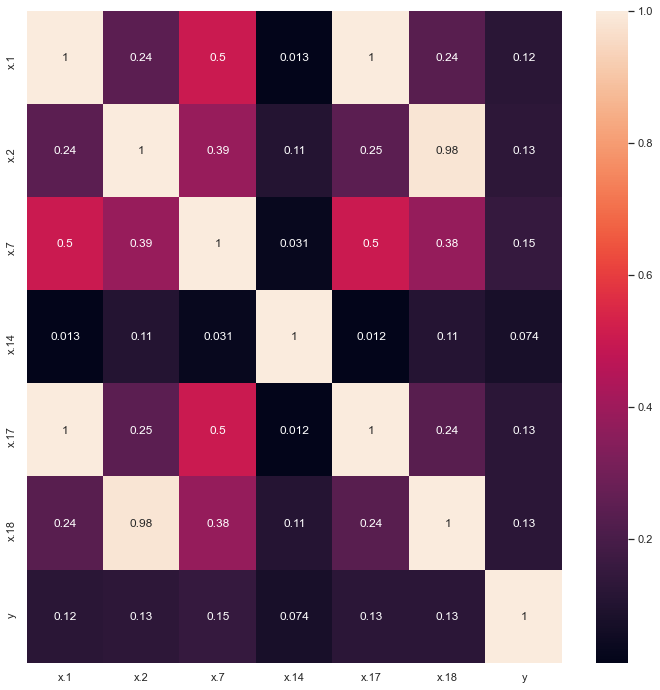

In [52]:
# calculate pair-wise correlations between the numerical features 
corrmat = selected_training_data.corr()

plt.figure(figsize=(12,12))
sns.heatmap(corrmat, annot=True);

In [53]:
# Check for correlation in the training dataset
def get_correlated(data, threshold):
    '''
    This function returns variables with high correlation based on the threshold specified
    '''
    cols = set()
    corrmat = data.corr()
    for i in range(len(corrmat.columns)):
        for j in range(i):
            if corrmat.iloc[i,j] > threshold:
                colname = corrmat.columns[i]
                cols.add(colname)
    return cols

In [54]:
# features having correlation greater than 0.9 will be dropped from our dataset
correlating_variables = get_correlated(selected_training_data, 0.9)

## These variables are correlating with other variables in the dataset
correlating_variables

{'x.17', 'x.18'}

In [55]:
### Drop correlating variables
selected_training_data = selected_training_data.drop(list(correlating_variables), axis=1)
selected_training_data.shape

(2671, 12)

### Encode Categorical Variables

Because scikit learn algorithms won't accept strings, we have to encode our categorical features. **Since these features are nominal, we will apply an encoding that does not add rank to unique element of these features**, thus we will have 0s and 1s for when an observation is absent or present respectively. For this purpose, pandas get dummies will be used. To prevent the dummy variable trap, one of the encoded feature will be dropped.

In [56]:
# function to create dummy variables
def dummy_creation(data):
    '''
    This functions create dummy variables by selecting categorical varaibles from a dataframe
    
    parameters::
    - data :: DataFrame Object
    
    output::
    - DataFrame
    '''
    df_dummies = []
    
    # select only categorical variables
    training_data_cat = data.select_dtypes(include = 'object')
    # Iterate throught the columns
    for column in training_data_cat.columns:
        # using pandas get dummies, create a dummy variable across the selected variable dropping first dummy to 
        # prevent variable correlation
        df_dummies.append(pd.get_dummies(data[column], prefix = column, drop_first=True, prefix_sep = '-'))
    # Concatenate all dummy variables together   
    df_dummies = pd.concat(df_dummies, axis = 1)
    # Concatenate the newly created dummy variables with the old dataset
    data = pd.concat([data, df_dummies], axis = 1)
    # Drop original categorical variables from which dummy has been created
    data.drop(training_data_cat.columns, axis=1,inplace = True)
    
    # Return dataset
    return data

In [57]:
# create dummy variables for categorical features in the training dataset
training_data = dummy_creation(selected_training_data)

In [58]:
training_data.head()

,x.1,x.2,x.7,x.14,y,x.3-u,x.3-y,x.4-p,x.5-c,x.5-d,x.5-e,x.5-f,x.5-i,x.5-j,x.5-k,x.5-m,x.5-q,x.5-r,x.5-w,x.5-x,x.6-d,x.6-f,x.6-h,x.6-j,x.6-n,x.6-o,x.6-v,x.6-z,x.8-b,x.8-c,x.8-t,x.9-t,x.12-p,x.12-s
0,30.83,5.3525,1.25,555.5,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0
1,58.67,4.4600,3.04,560.0,1.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0
2,24.50,0.5000,1.50,824.0,1.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
3,27.83,1.5400,3.75,3.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0
4,20.17,5.6250,1.71,555.5,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1


In [59]:
training_data.shape

(2671, 34)

### Apply All Data Cleaning and Data Preparation Steps on Validation Data

In [60]:
# Read in validation dataset
val_data = pd.read_csv('validation_grover.csv',sep=';', index_col=0)
val_data.shape

(490, 21)

In [61]:
val_data['y'].value_counts()

bad     336
good    154
Name: y, dtype: int64

In [62]:
### Apply steps

# 1. Drop variables with Large Missing/Unknown Values ['x.16' and 'x.20'] just like in training data
val_data = val_data.drop(['x.16','x.20'], axis=1)

# 2. Encode Target Variable 
val_data['y'] = val_data['y'].replace({'good': '1', 'bad': '0'})

# 3. Clean Data
for column in val_data.columns:
    val_data[column] = preprocess(val_data, column)

# 4. Select significant variables
val_data = val_data[categorical_features + num_features + ['y']]

# 5. Drop Correlating variables
val_data = val_data.drop(list(correlating_variables), axis=1)

# 6. Dummy variables creation
val_data = dummy_creation(val_data)

In [63]:
# validation Data Dimension after cleaning and preparation
val_data.shape

(490, 34)

### Data Splitting

In [64]:
# Split training dataset
X_train = training_data.drop('y', axis=1)
y_train = training_data['y']

# Split validation dataset
X_val = val_data.drop('y', axis=1)
y_val = val_data['y']

### Balance Training Dataset

A balanced dataset is vital when building predictive models. Imbalanced dataset will result in a model predicting the majority class most of the time. The result of this being that it understands the trend of the majority class better than the minority class(es).

There are different methods of balancing datasets in other to get the best of our trained model. The most common methods are:

1. Undersampling
2. Oversampling
3. Synthetic minority over-sampling technique (SMOTE)

Undersampling simply reduces the observation in the majority class(es) balancing it with class with the least observation. Undersampling is not very efficient as information will be lost when obsevations are being dropped from the majority class(es). Oversampling does the opposite but with a little difference when considering SMOTE.

For this task, we will be using SMOTE as it has proven to be the best method of generating samples to balance up the minority class(es). SMOTE simply synthesizes elements of the minority class using the existing ones. It randomly chooses a point from the minority class and computes the k-nearest neighbors (default = 5) for this point. The synthetic points are added between the chosen point and its neighbors by choosing a factor between 0 and 1 to multiply the distance.

**NOTE:** Data balancing is done only on the training data

In [65]:
# Using SMOTE from imbalance learn (imblearn)
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [66]:
# Check to see if the dataset is now balanced 
from collections import Counter
Counter(y_train)

Counter({1.0: 2398, 0.0: 2398})

### Modelling and Evaluation

Now that we have a cleaned, well prepared and balanced training dataset. It is time to train our model. While bunch of machine learning tasks is done during data preprocessing and preparation, modelling also require special skills in order to build a robust model.

In this modellind section, I will be doing the following:

- Create a pipeline which holds all the processes involved in training the model
- Train at least 5 or 6 machine learning algorithms and select the best using Cross Validation Technique
- We fit the data on the best algorithm 
- Hyperparametere Tune the selected algorithm if necessary
- Evaluate the newly built model

#### Cross Validation for algorithm selection

Cross-validation is a technique majorly used for preventing overfitting. However, it has been used over time in algorithm selection. Cross-validation works by splitting the entire dataset into K number of folds as specified.

For every iteration given a K value, the dataset is splitted into training dataset and validation dataset based on the K value at that iteration. The advantage of using cross-validation during training and algortihm selection is that it uses the entire dataset in the process, there by validating on a specified split and train on the rest of the dataset.

Running cross-validation of different algorithm returns a mean accuracy score which shows which algorithm fits well with the data.

A further step can be to do hyper-parameter tuning on the algorithms with the best mean accuracy to better optimize them for modelling.

In [67]:
# This function performs cross-validation on algorithms and return its mean accuracy
def select_algo(algo, X, y):
    '''
    This function runs cross validation on data and returns mean accuracy
    
    prarmeters ::
    - algo :: Machine Learning Algorithm
    - X :: Independent variables
    - y :: Target Variable
    '''
    cv_scores=cross_val_score(algo, X, y, cv=10, scoring='accuracy')
    
    return cv_scores.mean()

In [68]:
## The 6 selected algorithms(classifiers) to test
classifiers = []

classifiers.append(('Logistic Regression', LogisticRegression()))
classifiers.append(('Ada Boost Classifier', AdaBoostClassifier()))
classifiers.append(('KNN', KNeighborsClassifier()))
classifiers.append(('Decision Tree', DecisionTreeClassifier()))
classifiers.append(('Random Forest', RandomForestClassifier()))
classifiers.append(('Naive Bayes', GaussianNB()))

In [69]:
#### This process would iteratively pick the above stated algorithms, create a machine learning pipeline and fit the data
best_algo = {}

for classifier in classifiers:
    
    ### Pipeline creation
    pipeline = Pipeline([('Standard Scaler', StandardScaler())])
    pipeline.steps.append(classifier)
    
    ## The select_algo function is instantiated here, this would return a mean score from the cross-validation process
    cv_score = select_algo(pipeline, X_train, y_train)
    
    best_algo.setdefault('Classifier',[]).append(classifier[0])
    best_algo.setdefault('cv_score',[]).append(cv_score)

In [70]:
### The Result of the Cross Validatio process highlighting how the algorithms fit the data
pd.DataFrame(best_algo).sort_values('cv_score', ascending=False, ignore_index=True)

,Classifier,cv_score
0,Random Forest,0.993125
1,Decision Tree,0.986874
2,KNN,0.979790
3,Ada Boost Classifier,0.954357
4,Logistic Regression,0.938303
5,Naive Bayes,0.902025


The Above process shows the *best algorithm* to fit the data with is the **Random Forest Classifier**

### Hyper Parameter Tuning

The Major purpose of tuning parameters of an algorithm is to optimally get the best performance of the algorithm. We select few parameters to tune leaving the rest as default and then run iterations which is the number of times the training will occur randomly picking the parameters against themselves.

Tuning parameter can be done using **GridSearch** or **RandomizedSearch**. 

**RandomizedSearch is used here due to the fact that GridSearch can be computationally expensive**.

While they give approximately the same result. GridSearch does more but takes time to fit the data.

In [71]:
### Instantiate the classifier
rfc = RandomForestClassifier()

# Scale training data to be used to prevent bias
scaler = StandardScaler()
X_train_tune = scaler.fit_transform(X_train)

# Randomly select parameters to tune
param_dist = dict(
    n_estimators = [100,200,300,400,500], 
    criterion=["gini", "entropy"],
    random_state=[5,10,15,20,25],
    class_weight = ["balanced", "balanced_subsample"],
)

## Range of cross-validation during tuninig
k_range = range(2, 12)

# An empty dictionary to tack tuning results 
k_score = {}

for k in k_range:
    rfc_random = RandomizedSearchCV(rfc, param_dist, cv=k, scoring='accuracy',n_iter=10, n_jobs=-1,verbose=1)
    rfc_random.fit(X_train_tune, y_train)

    k_score.setdefault('Best Accuracy',[]).append(rfc_random.best_score_)
    k_score.setdefault('Best tuned parameter',[]).append(rfc_random.best_params_)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 4 folds for each of 10 candidates, totalling 40 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 6 folds for each of 10 candidates, totalling 60 fits
Fitting 7 folds for each of 10 candidates, totalling 70 fits
Fitting 8 folds for each of 10 candidates, totalling 80 fits
Fitting 9 folds for each of 10 candidates, totalling 90 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 11 folds for each of 10 candidates, totalling 110 fits


In [72]:
### Result of Hyperparameter Tuning by Number of CV
hyp_result = pd.DataFrame(k_score)
hyp_result

,Best Accuracy,Best tuned parameter
0,0.991034,"{'random_state': 15, 'n_estimators': 100, 'cri..."
1,0.990828,"{'random_state': 20, 'n_estimators': 300, 'cri..."
2,0.992077,"{'random_state': 5, 'n_estimators': 300, 'crit..."
3,0.992500,"{'random_state': 25, 'n_estimators': 200, 'cri..."
4,0.992083,"{'random_state': 10, 'n_estimators': 500, 'cri..."
5,0.992295,"{'random_state': 25, 'n_estimators': 400, 'cri..."
6,0.992083,"{'random_state': 15, 'n_estimators': 100, 'cri..."
7,0.992495,"{'random_state': 10, 'n_estimators': 400, 'cri..."
8,0.993125,"{'random_state': 25, 'n_estimators': 100, 'cri..."
9,0.993536,"{'random_state': 10, 'n_estimators': 100, 'cri..."


In [73]:
## Get the best parameters returned for Result with the Highes Accuracy
best_parameters = hyp_result[hyp_result['Best Accuracy']==hyp_result['Best Accuracy'].max()]['Best tuned parameter'].values[0]
best_parameters

{'random_state': 10,
 'n_estimators': 100,
 'criterion': 'gini',
 'class_weight': 'balanced'}

### Fit Random Forest Classifier with the best parameters

**Scaling and Normalization**

Scaling and Normalization is an essential part of every ML process. The reason for this is to prevent bias in our model training process. Scikit learn algorithms tend to attach more importance to features with large numerical figures making the model bias towards features with large numerics. To prevent this and ensure our algorithm train without bias, we scale the dataset. There are differnt methods of scaling our dataset, StandardScaler, MinMax scaler etc.

For this task, StandardScaler is used and as a result, we infuse it in the ML pipeline

In [75]:
## Instantiate the ML pipeline and fit using the best possible parameters
rfc_classifier = Pipeline([
    ('Standard Scaler', StandardScaler()),
    ('Random Forest', RandomForestClassifier(**best_parameters))
])

In [76]:
### Train the model
rfc_classifier.fit(X_train, y_train)

Pipeline(steps=[('Standard Scaler', StandardScaler()),
                ('Random Forest',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=10))])

In [77]:
# Make prediction on validation data
predictions = rfc_classifier.predict(X_val)

In [78]:
## Classification Report 
print(classification_report(y_val, predictions))

              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95       336
         1.0       0.90      0.90      0.90       154

    accuracy                           0.93       490
   macro avg       0.92      0.92      0.92       490
weighted avg       0.93      0.93      0.93       490



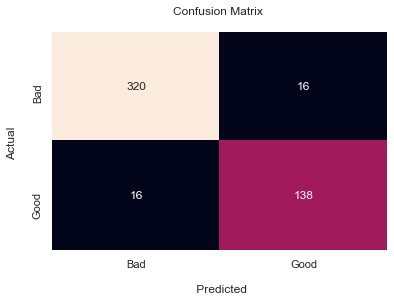

In [79]:
# Confusion Matrix
cm = confusion_matrix(y_val, predictions)

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cbar=False)

# # labels, title and ticks
ax.set_xlabel('\n Predicted')
ax.set_ylabel('Actual \n')
ax.set_title('Confusion Matrix \n')
ax.xaxis.set_ticklabels(['Bad', 'Good'])
ax.yaxis.set_ticklabels(['Bad', 'Good']);

#### Model Evaluation Report

The classification report shows some of the best metrics to evaluating machine learning classification tasks (Binary Classifications or Multi-class classifications). It gives extended report in terms of the model precision, recall, fi-score and a general accuracy report.

From our classification report it is observed the trained model has a general accuracy of **93% on the validation data**, and it performs well when predicting bad samples as evident in the f1-score of 0.95 to 0.90 for good samples. This is due to the proportion of good samples in the validation dataset. While it is not imperative for all the target class to be equal in proportion, it expected they are fairly close to have a robust data.

F1-score is the preffered metric used here as it combines precision and recall in its computation and as such provides the best estimate when prediciting class or category of any classification problem rather than just using accuracy.

In the confusion matrix, out of 336 Bad observations, the model was able to predict 320 correctly and out of 154 Good observations, it was able to predict 138 correctly. The model is performing well but can be improved on.

### Conclusion

Given the model has a 99% accuracy on training data and 93% on validation data shows it is performing well enough and has not overfitted by prediciting unseen data fairly well. 

The model can be further improved on if more bad samples or observation can be obtained in the training data. This would ensure a much more robust model built on real data instead of relying on SMOTE to balance the data using a synthesized data.

# ! $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$  I HAD FUN WORKING ON THIS! 🙂